In [1]:
import numpy as np
import pandas as pd
import featuretools as ft
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
import lightgbm as lgb
from sklearn.model_selection import train_test_split

PATH = "../datasets/tradhist.csv"
df = pd.read_csv(PATH)

In [2]:
features = ["GDP_o", "GDP_d", "POP_o", "POP_d", "Distw", "Comlang", "Contig", "OECD_o", "OECD_d",
            "GATT_o", "GATT_d", "XPTOT_o", "year", "FLOW", 'IPTOT_d', 'IPTOT_o', 'XPTOT_d', "iso_o", "iso_d"]
new_df = df[features]
new_df.shape

(2502427, 19)

In [3]:
cleaned_df = new_df.loc[(new_df["year"] > 2008) & (new_df["FLOW"] > 100)].dropna()
cleaned_df.shape

(129408, 19)

In [4]:
plot_data = cleaned_df.loc[(cleaned_df["iso_o"] == "USA") & (cleaned_df["year"] == 2013)]

In [8]:
plot_data

,GDP_o,GDP_d,POP_o,POP_d,Distw,Comlang,Contig,OECD_o,OECD_d,GATT_o,GATT_d,XPTOT_o,year,FLOW,IPTOT_d,IPTOT_o,XPTOT_d,iso_o,iso_d
2328256,1.065877e+13,1.282286e+10,316427.4,30682.500,11626.578951,0.0,0.0,1.0,0.0,1.0,0.0,1.009660e+12,2013,9.918583e+08,5.355286e+09,1.450988e+12,4.257171e+08,USA,AFG
2328350,1.065877e+13,7.990138e+10,316427.4,23448.201,12153.605553,0.0,0.0,1.0,0.0,1.0,1.0,1.009660e+12,2013,1.015641e+09,1.422024e+10,1.450988e+12,4.239514e+10,USA,AGO
2328433,1.065877e+13,8.175526e+09,316427.4,2896.652,8882.747080,0.0,0.0,1.0,0.0,1.0,1.0,1.009660e+12,2013,5.232510e+07,3.133526e+09,1.450988e+12,1.470210e+09,USA,ALB
2328687,1.065877e+13,2.476717e+11,316427.4,9039.978,12196.149826,0.0,0.0,1.0,0.0,1.0,1.0,1.009660e+12,2013,1.720541e+10,1.648221e+11,1.450988e+12,2.424315e+11,USA,ARE
2328875,1.065877e+13,3.991050e+11,316427.4,42538.305,8678.352247,1.0,0.0,1.0,0.0,1.0,1.0,1.009660e+12,2013,5.192647e+09,4.733664e+10,1.450988e+12,5.258155e+10,USA,ARG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2350578,1.065877e+13,5.090125e+08,316427.4,190.390,10017.215222,1.0,0.0,1.0,0.0,1.0,1.0,1.009660e+12,2013,1.997924e+07,3.037680e+08,1.450988e+12,1.141149e+08,USA,WSM
2350645,1.065877e+13,2.299869e+10,316427.4,25533.217,12630.027024,0.0,0.0,1.0,0.0,1.0,0.0,1.009660e+12,2013,3.646560e+08,9.887240e+09,1.450988e+12,6.797389e+09,USA,YEM
2350897,1.065877e+13,2.341530e+11,316427.4,53192.215,14418.611678,1.0,0.0,1.0,0.0,1.0,1.0,1.009660e+12,2013,4.627225e+09,7.245120e+10,1.450988e+12,8.031384e+10,USA,ZAF
2351181,1.065877e+13,1.793963e+10,316427.4,15246.086,13702.220374,1.0,0.0,1.0,0.0,1.0,1.0,1.009660e+12,2013,1.301096e+08,6.515267e+09,1.450988e+12,6.770876e+09,USA,ZMB


In [9]:
cleaned_df

,GDP_o,GDP_d,POP_o,POP_d,Distw,Comlang,Contig,OECD_o,OECD_d,GATT_o,GATT_d,XPTOT_o,year,FLOW,IPTOT_d,IPTOT_o,XPTOT_d,iso_o,iso_d
1707,1.613070e+09,1.119100e+10,101.936,28809.168,13168.223762,0.0,0.0,0.0,0.0,0.0,0.0,2.671829e+09,2011,60232.73,6.612774e+09,3.692892e+09,3.224723e+08,ABW,AFG
1839,1.604113e+09,1.627569e+11,101.416,7705.423,12773.079714,0.0,0.0,0.0,0.0,0.0,1.0,1.363620e+09,2009,11195.58,9.999943e+10,1.571841e+09,1.232484e+11,ABW,ARE
1841,1.613070e+09,2.175294e+11,101.936,8734.722,12773.079714,0.0,0.0,0.0,0.0,0.0,1.0,2.671829e+09,2011,113576.80,1.365564e+11,3.692892e+09,1.884906e+11,ABW,ARE
1874,1.604113e+09,2.417646e+11,101.416,40798.640,5187.787570,0.0,0.0,0.0,0.0,0.0,1.0,1.363620e+09,2009,894681.06,2.489420e+10,1.571841e+09,3.806315e+10,ABW,ARG
1875,1.597046e+09,2.987639e+11,101.597,41222.875,5187.787570,0.0,0.0,0.0,0.0,0.0,1.0,1.848131e+08,2010,166.97,3.636240e+10,9.023266e+08,4.582931e+10,ABW,ARG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2502422,6.097825e+09,1.311544e+10,13973.897,13917.439,583.795386,1.0,1.0,0.0,0.0,1.0,1.0,2.070475e+09,2010,46558256.00,3.442585e+09,2.673542e+09,4.636377e+09,ZWE,ZMB
2502423,6.838230e+09,1.464204e+10,14255.592,14343.526,583.795386,1.0,1.0,0.0,0.0,1.0,1.0,2.192061e+09,2011,55171376.00,4.543546e+09,3.097955e+09,5.510135e+09,ZWE,ZMB
2502424,7.845171e+09,1.614464e+10,14565.482,14786.581,583.795386,1.0,1.0,0.0,0.0,1.0,1.0,2.457760e+09,2012,58787336.00,5.562818e+09,3.321382e+09,5.922680e+09,ZWE,ZMB
2502425,8.629172e+09,1.793963e+10,14898.092,15246.086,583.795386,1.0,1.0,0.0,0.0,1.0,1.0,2.243481e+09,2013,77869780.00,6.515267e+09,3.244361e+09,6.770876e+09,ZWE,ZMB


In [11]:
cleaned_df = pd.concat([cleaned_df, plot_data, plot_data]).drop_duplicates(keep=False)

In [12]:
cleaned_df = cleaned_df.drop(["year"], axis=1)
X = cleaned_df[["GDP_o", "GDP_d", "POP_o", "POP_d", "Distw", "Comlang", "Contig",
                "XPTOT_o", "FLOW", 'IPTOT_d', 'IPTOT_o', 'XPTOT_d']]

y = cleaned_df[["FLOW"]]

In [14]:
train_features, valid_features, train_y, valid_y = train_test_split(X, y,
                                                                    test_size=0.25, random_state=42)
model = lgb.LGBMRegressor()
model.fit(train_features, train_y, early_stopping_rounds=100, eval_set=[(valid_features, valid_y)],
          eval_metric='rmse', verbose=200)

LGBMRegressor()

In [15]:
X_test = plot_data[["GDP_o", "GDP_d", "POP_o", "POP_d", "Distw", "Comlang", "Contig",
                "XPTOT_o", "FLOW", 'IPTOT_d', 'IPTOT_o', 'XPTOT_d']]

y_test = plot_data[["FLOW"]]

In [16]:
model.score(X_test, y_test)

0.9772115367045292

In [18]:
plot_data["forecast"] = model.predict(X_test)

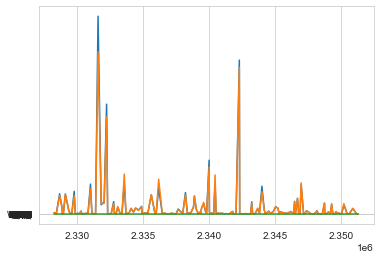

In [20]:
plt.plot(plot_data["FLOW"])
plt.plot(plot_data["forecast"])

In [44]:
plot_data = plot_data.sample(frac = 1)

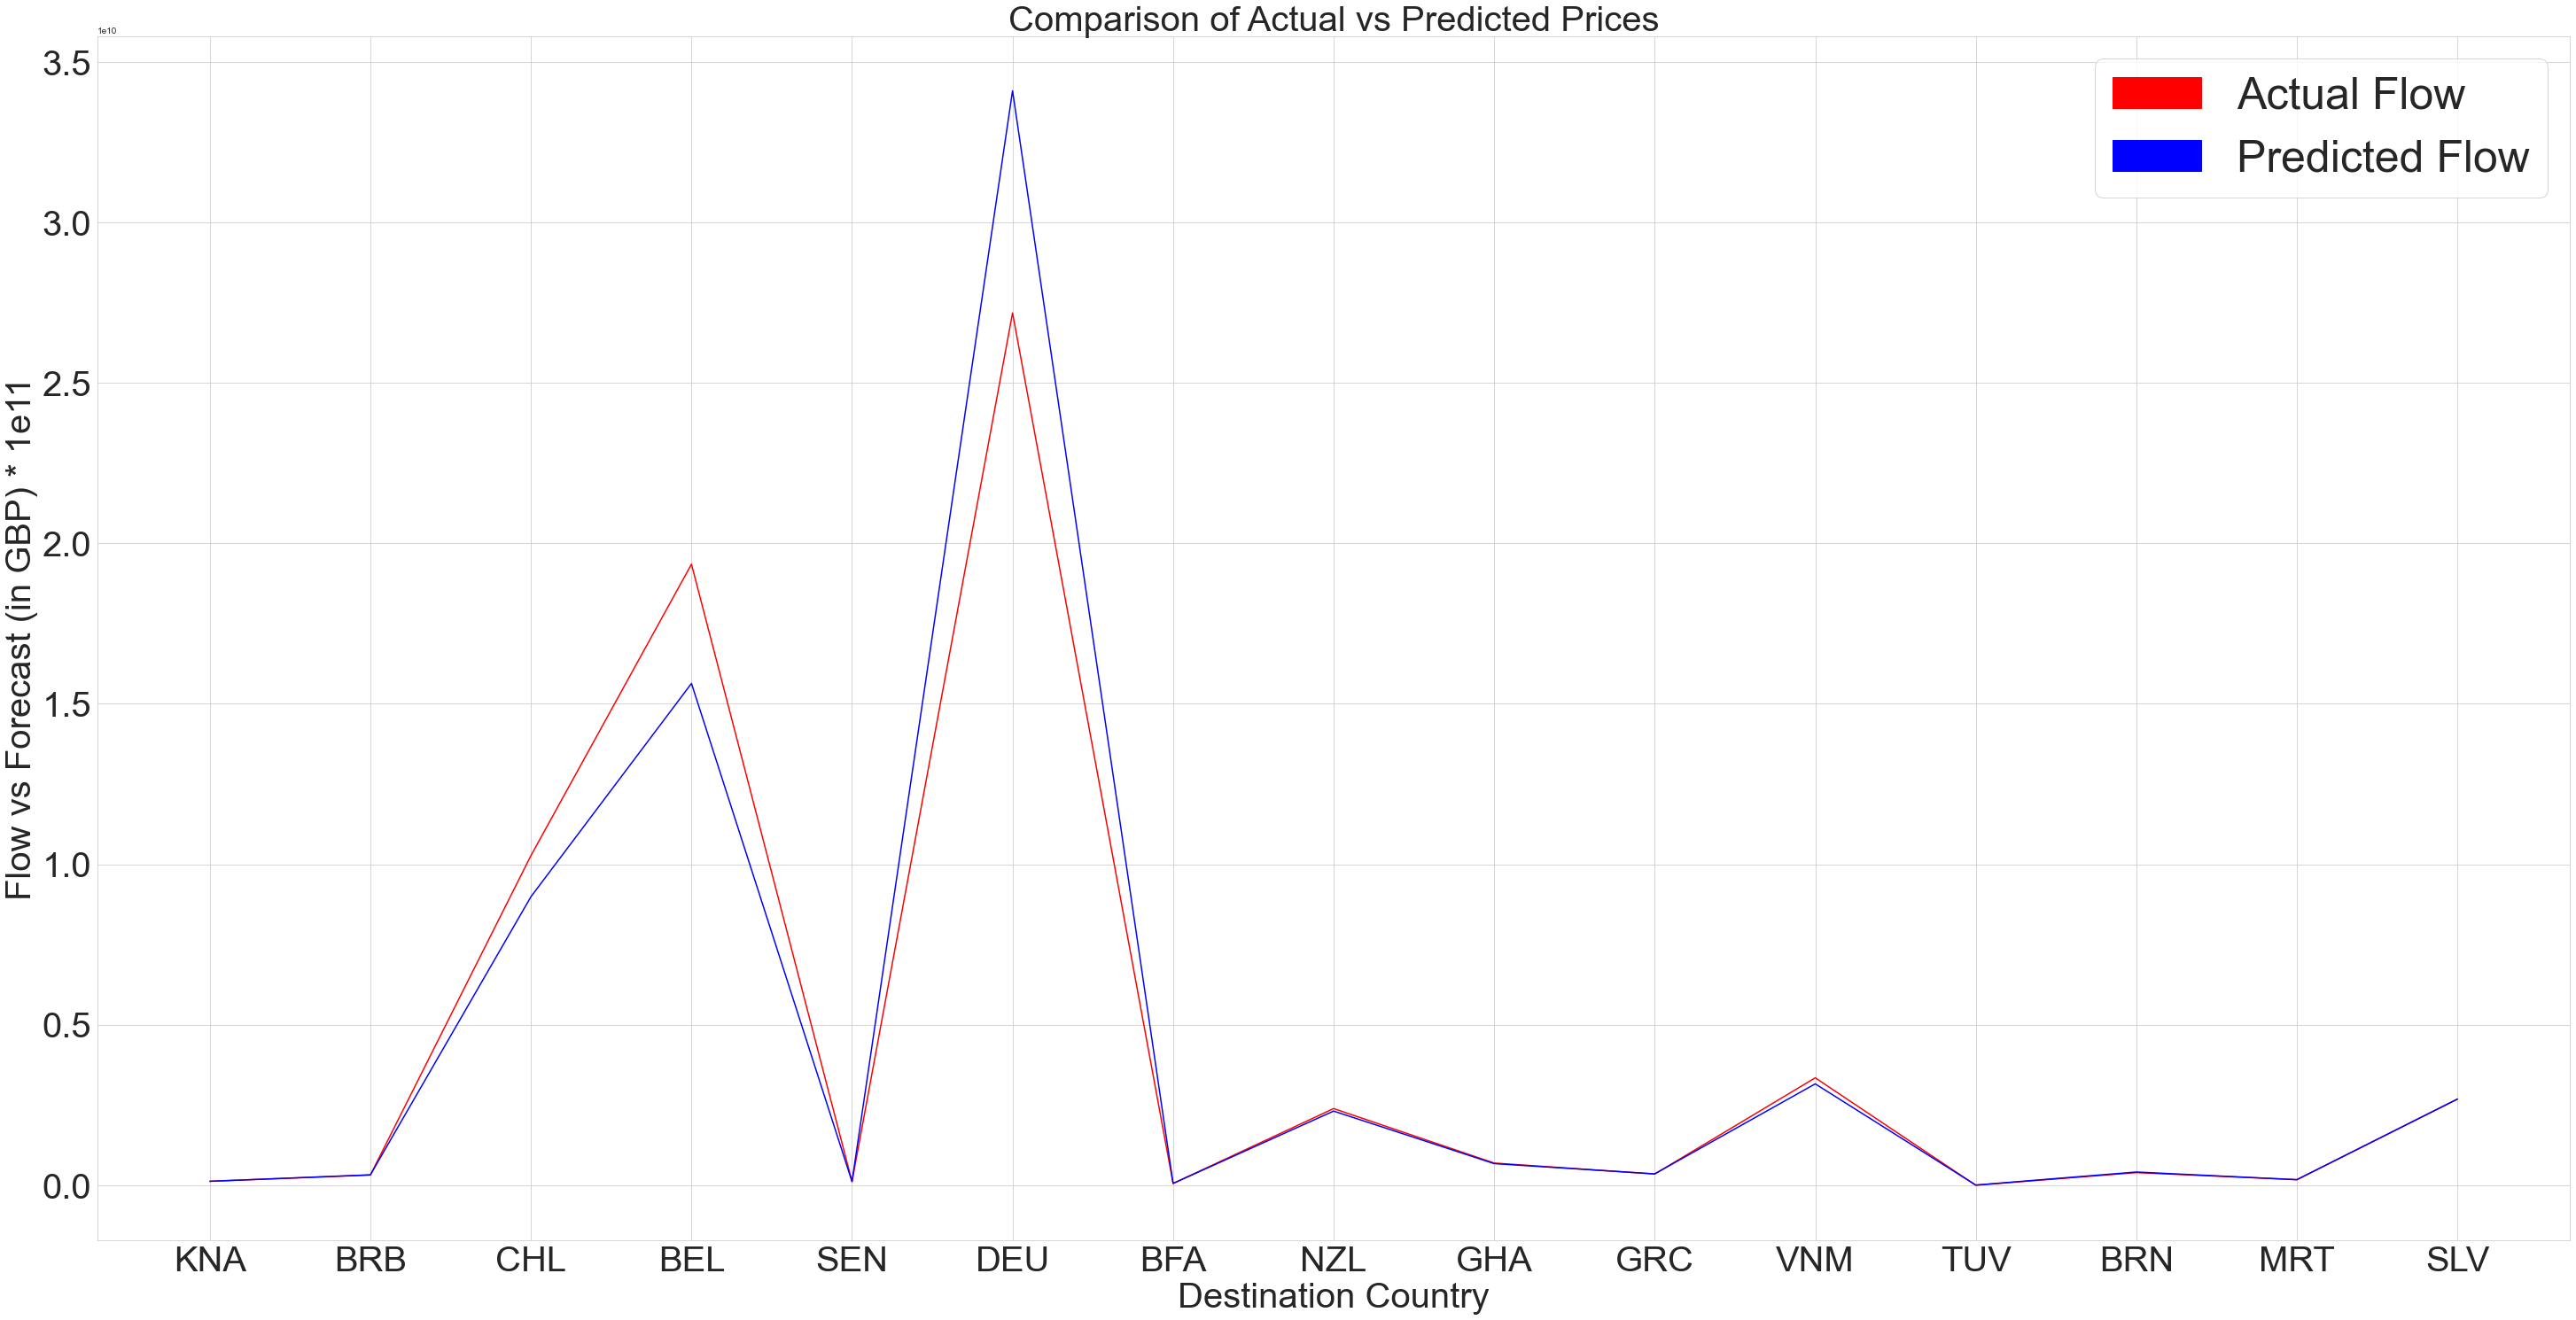

In [100]:
import matplotlib.patches as mpatches

fig,ax=plt.subplots(figsize=(50,25))
ax.plot(plot_data[:15].iso_d, plot_data[:15].FLOW, color="red")
ax.set_xlabel("Destination Country", fontsize=40)
ax.set_ylabel("Flow vs Forecast (in GBP) * 1e11", fontsize=40)
ax.set_title("Comparison of Actual vs Predicted Prices", fontsize=40)
ax.plot(plot_data[:15].iso_d, plot_data[:15]["forecast"], color="blue")
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(40)
red_patch = mpatches.Patch(color='red', label='Actual Flow')
blue_patch = mpatches.Patch(color='blue', label='Predicted Flow')

plt.legend(handles=[red_patch, blue_patch], prop={'size': 50})
plt.show()

# Neural Nets

In [59]:
cleaned_df

,GDP_o,GDP_d,POP_o,POP_d,Distw,Comlang,Contig,OECD_o,OECD_d,GATT_o,GATT_d,XPTOT_o,FLOW,IPTOT_d,IPTOT_o,XPTOT_d,iso_o,iso_d
1707,1.613070e+09,1.119100e+10,101.936,28809.168,13168.223762,0.0,0.0,0.0,0.0,0.0,0.0,2.671829e+09,60232.73,6.612774e+09,3.692892e+09,3.224723e+08,ABW,AFG
1839,1.604113e+09,1.627569e+11,101.416,7705.423,12773.079714,0.0,0.0,0.0,0.0,0.0,1.0,1.363620e+09,11195.58,9.999943e+10,1.571841e+09,1.232484e+11,ABW,ARE
1841,1.613070e+09,2.175294e+11,101.936,8734.722,12773.079714,0.0,0.0,0.0,0.0,0.0,1.0,2.671829e+09,113576.80,1.365564e+11,3.692892e+09,1.884906e+11,ABW,ARE
1874,1.604113e+09,2.417646e+11,101.416,40798.640,5187.787570,0.0,0.0,0.0,0.0,0.0,1.0,1.363620e+09,894681.06,2.489420e+10,1.571841e+09,3.806315e+10,ABW,ARG
1875,1.597046e+09,2.987639e+11,101.597,41222.875,5187.787570,0.0,0.0,0.0,0.0,0.0,1.0,1.848131e+08,166.97,3.636240e+10,9.023266e+08,4.582931e+10,ABW,ARG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2502422,6.097825e+09,1.311544e+10,13973.897,13917.439,583.795386,1.0,1.0,0.0,0.0,1.0,1.0,2.070475e+09,46558256.00,3.442585e+09,2.673542e+09,4.636377e+09,ZWE,ZMB
2502423,6.838230e+09,1.464204e+10,14255.592,14343.526,583.795386,1.0,1.0,0.0,0.0,1.0,1.0,2.192061e+09,55171376.00,4.543546e+09,3.097955e+09,5.510135e+09,ZWE,ZMB
2502424,7.845171e+09,1.614464e+10,14565.482,14786.581,583.795386,1.0,1.0,0.0,0.0,1.0,1.0,2.457760e+09,58787336.00,5.562818e+09,3.321382e+09,5.922680e+09,ZWE,ZMB
2502425,8.629172e+09,1.793963e+10,14898.092,15246.086,583.795386,1.0,1.0,0.0,0.0,1.0,1.0,2.243481e+09,77869780.00,6.515267e+09,3.244361e+09,6.770876e+09,ZWE,ZMB


In [60]:
transformed_df = np.log(cleaned_df[["GDP_o", "GDP_d", "POP_o", "POP_d", "Distw", "XPTOT_o", "FLOW"]])

In [62]:
remaining_df = cleaned_df[["Comlang", "Contig", "OECD_o", "OECD_d",
                           "GATT_o", "GATT_d"]]

In [63]:
final_df = pd.merge(transformed_df, remaining_df, left_index=True, right_index=True)

In [64]:
X_nn = cleaned_df[["GDP_o", "GDP_d", "POP_o", "POP_d", "Distw", "Comlang", "Contig",
                "XPTOT_o", "FLOW", 'IPTOT_d', 'IPTOT_o', 'XPTOT_d']]

y_nn = cleaned_df[["FLOW"]]

In [65]:
X_val_nn = X_nn.values
y_val_nn = y_nn.values
from sklearn.preprocessing import StandardScaler

PredictorScaler = StandardScaler()
TargetVarScaler = StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit = PredictorScaler.fit(X_val_nn)
TargetVarScalerFit = TargetVarScaler.fit(y_val_nn)

# Generating the standardized values of X and y
X_val = PredictorScalerFit.transform(X_val_nn)
y_val = TargetVarScalerFit.transform(y_val_nn)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_val_nn, y_val_nn, test_size=0.25, random_state=42)

In [66]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(96921, 12)
(96921, 1)
(32307, 12)
(32307, 1)


In [94]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

# create ANN model
model = Sequential()

# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=12, kernel_initializer='normal', activation='relu'))
#model.add(Dropout(0.2))
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
# The output neuron is a single fully connected node
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [95]:
history = model.fit(X_train, y_train, epochs=50, verbose=1, shuffle=True)

Epoch 1/50
  20/3029 [..............................] - ETA: 17s - loss: 6869809673239789568.0000

2022-11-20 10:11:07.308385: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 900/3029 [=======>......................] - ETA: 10s - loss: 13313212244553629696.0000

KeyboardInterrupt: 